In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import shutil
from sklearn.linear_model import LinearRegression

In [3]:
genome_dir = "/home/sbraganza/projects/57genomes/ncbi_dataset/data"

In [3]:
# dive into json to find checkM percent
jsonlist = list(open(genome_dir + '/assembly_data_report.jsonl'))

feed = []
for idx in range(len(jsonlist)):
    json_dict = json.loads(jsonlist[idx])
    feed.append(json_dict)

with open(genome_dir + '/test.json', 'w') as file:
    json.dump(feed, file)


JSONDecodeError: Expecting value: line 2 column 1 (char 3647)

In [4]:
df = pd.read_csv(genome_dir + '/data_summary3.tsv', sep='\t')
print(df.columns)

Index(['Assembly Accession', 'Organism Scientific Name',
       'Organism Common Name', 'Organism Qualifier', 'Taxonomy id',
       'Assembly Name', 'Source', 'Annotation', 'Level', 'Contig N50', 'Size',
       'Submission Date', 'Gene Count', 'BioProject', 'BioSample', 'BUSCO',
       'CheckM Score'],
      dtype='object')


In [5]:
final = df[((df['Level'].isin(['Complete Genome', 'Chromosome'])) | (df['CheckM Score'] > 99.5)) & (df['BUSCO'] > 95)]
print(final.shape)

(57, 17)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

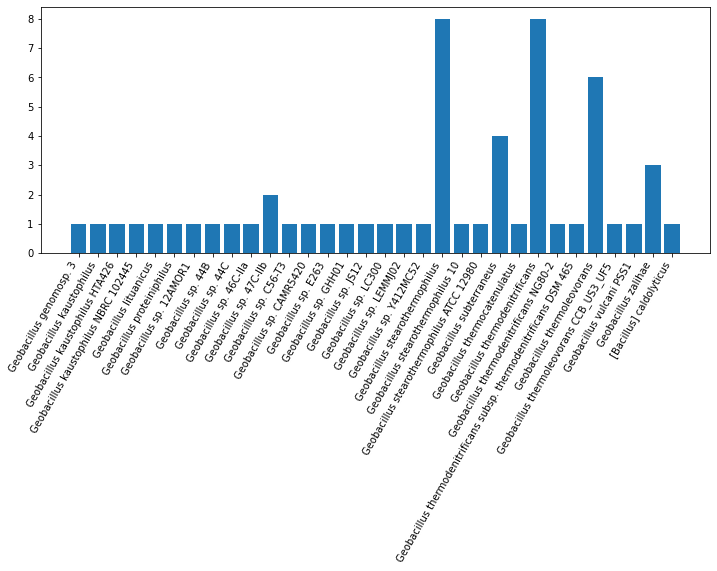

In [6]:
fig, ax = plt.subplots(figsize=(12,9))
plt.subplots_adjust(bottom=0.5)
bins, counts = np.unique(final.loc[:, 'Organism Scientific Name'].to_numpy(), return_counts=True)
ax.bar(bins, counts, label=bins)
# ax.hist(final['Organism Scientific Name'].to_numpy(),
#         bins=np.unique(final['Organism Scientific Name'].to_numpy()).shape[0],
#         linewidth=0.5, edgecolor="white")
plt.xticks(rotation=60, ha='right')
fig.savefig('species_distr.jpeg', dpi='900')

In [7]:
final_accessions = final['Assembly Accession'].to_numpy()
print(len(final_accessions))

57


In [8]:
for dir in os.listdir(genome_dir):
    if dir not in final_accessions:
        try:
            shutil.rmtree(genome_dir + '/' + dir)
        except NotADirectoryError:
            pass

In [10]:
with open(genome_dir + '/assembly_data_report.json', 'r') as ifile:
    assembly_report = json.load(ifile)

new_assembly_report = []

for x in assembly_report:
    if x['accession'] in final_accessions:
        new_assembly_report.append(x)

with open(genome_dir + '/assembly_data_report.json', 'w') as ofile:
    json.dump(new_assembly_report, ofile)